In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
from sklearn.linear_model import  LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

Here's what we know about this dataset:

- contains 303 rows (observations)
- 14 columns

And some documentation we found about each column:

1. **Age:** age in years
2. **Sex:** sex (1 = male; 0 = female)
3. **Cp:** chest pain type
   - Value 1: typical angina
   - Value 2: atypical angina
   - Value 3: non-anginal pain
   - Value 4: asymptomatic
4. **Trestbps:** resting blood pressure (in mm Hg on admission to the hospital)
5. **Chol:** serum cholesterol in mg/dl
6. **Fbs:** fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
7. **Restecg:** resting electrocardiographic results
   - Value 0: normal
   - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
   - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. **Thalach:** maximum heart rate achieved
9. **Exang:** exercise induced angina (1 = yes; 0 = no)
10. **Oldpeak:** ST depression induced by exercise relative to rest
11. **Slope:** the slope of the peak exercise ST segment
    - Value 1: upsloping
    - Value 2: flat
    - Value 3: downsloping
12. **Ca:** number of major vessels (0-3) colored by flourosopy
13. **Thal:** 
    - 3 = normal
    - 6 = fixed defect
    - 7 = reversible defect
14. **Diagnosed:** diagnosis of heart disease (angiographic disease status)
    - Value 0: < 50% diameter narrowing
    - Value 1: > 50% diameter narrowing

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/Hospital-Da-Luz-Learning-Health/MLCatolica24/main/Aula%204%20-%20Unsupervised%20Learning/data/heart_disease.csv')

### EDA

Visualize the first rows of the dataset

In [82]:
# show the first 15 rows of the dataset
#data...

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Diagnosed
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [83]:
# Get the summary statistics of the dataset
#data...

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Diagnosed
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


Missing values

In [84]:
# Check the missing values
#data...

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           4
thal         2
Diagnosed    0
dtype: int64

In [85]:
# drop missing values
#data = data....

Histograms

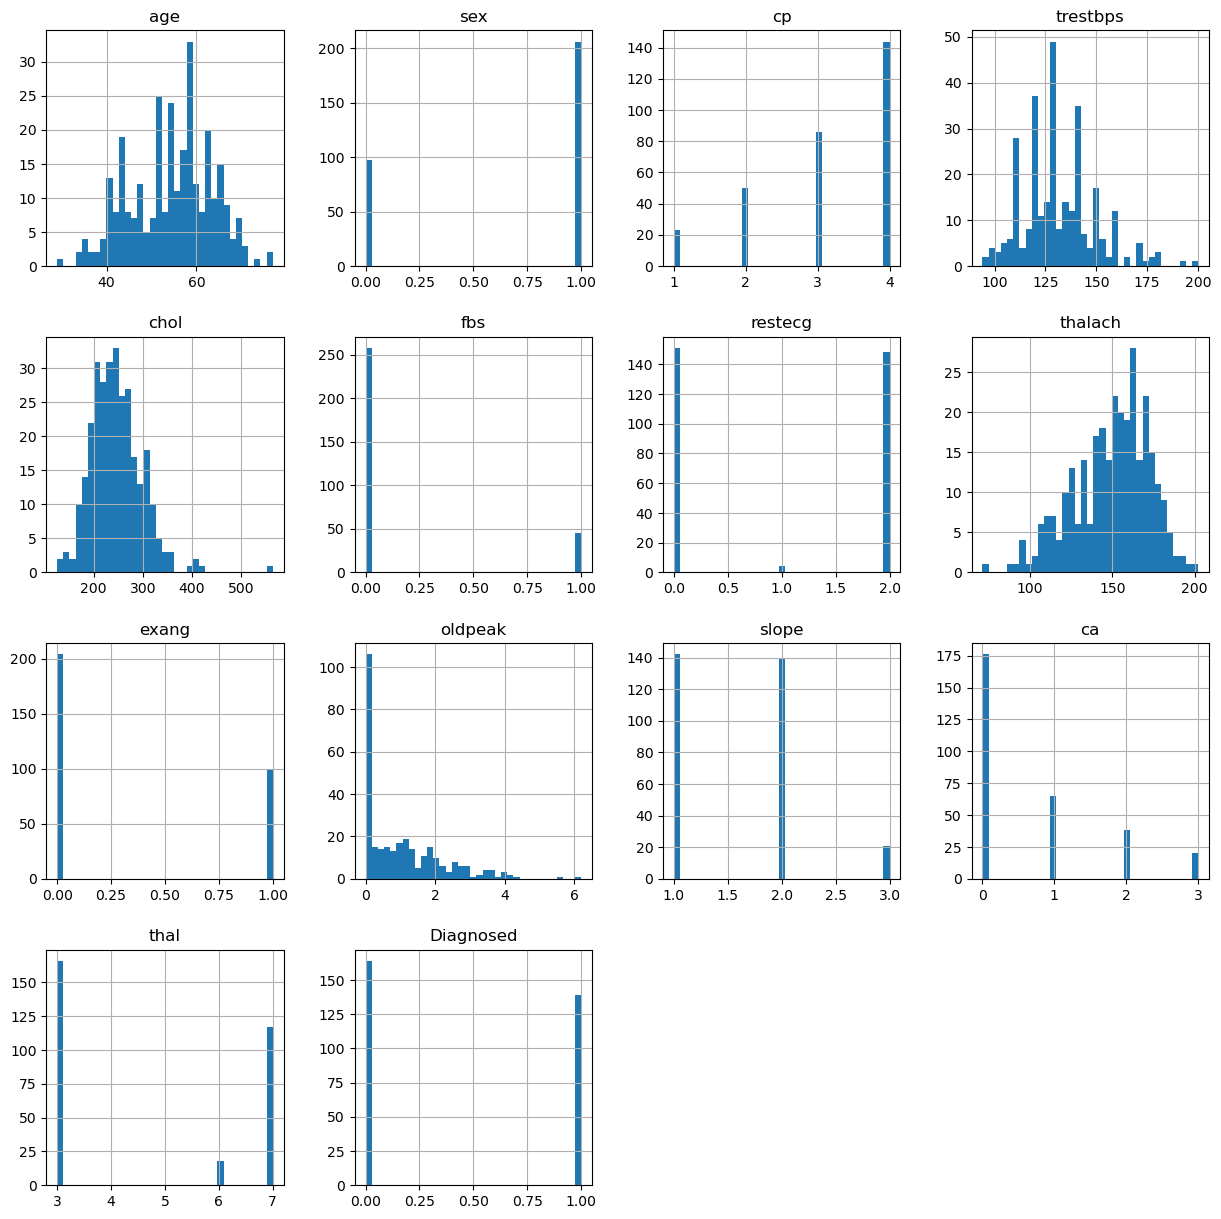

In [3]:
hists = data.hist(bins=35, figsize=(15,15))
plt.show()

Correlation

In [3]:
# Compute the correlation matrix 
# correlation_matrix = data...

In [ ]:
# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap= 'viridis',fmt='.2f')
plt.title('Correlation Matrix for Prima Diabetes dataset')
plt.show()

### Features Processing

Numeric features

In [4]:
# This will save in the list the numeric features
num_features = ['age', 'trestbps', 'chol','thalach', 'oldpeak']

Scaling

In [5]:
# standardize the numeric features
data_scaled = data.copy()
scaler = StandardScaler()
data_scaled[num_features] = scaler.fit_transform(data_scaled[num_features])

In [6]:
data_scaled.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Diagnosed
0,0.948726,1,1,0.757525,-0.264900,1,2,0.017197,0,1.087338,3,0.0,6.0,0
1,1.392002,1,4,1.611220,0.760415,0,2,-1.821905,1,0.397182,2,3.0,3.0,1
2,1.392002,1,4,-0.665300,-0.342283,0,2,-0.902354,1,1.346147,2,2.0,7.0,1
3,-1.932564,1,3,-0.096170,0.063974,0,0,1.637359,0,2.122573,3,0.0,3.0,0
4,-1.489288,0,2,-0.096170,-0.825922,0,2,0.980537,0,0.310912,1,0.0,3.0,0


Data Splitting

In [94]:
# Seprate the dataset into X and y
#X=data_scaled....
#y=data_scaled...

Train/Test split

In [95]:
## perform train and test spli with train size of 0.8
#X_train, X_test, y_train, y_test = train_test_split(..., ..., test_size= m, random_state=42)

In [96]:
# Create an instance of LogisticRegression
log_reg = ...

# Train/fit the Logistic Regression model
log_reg....

LogisticRegression()

In [97]:
# Make predictions on the test set
y_predict = log_reg....

In [98]:
y_predict

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1])

In [99]:
y_test.to_numpy()

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1])

Evaluate the model

In [100]:
# compute the accuracy of the models
#accuracy = ...
print(f"Logistic Regression Accuracy: {accuracy:.2f}")

Logistic Regression Accuracy: 0.83


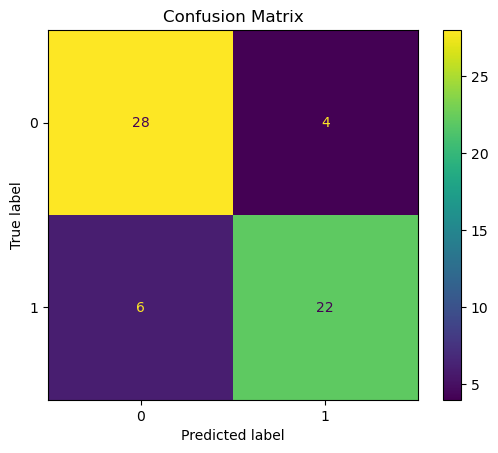

In [101]:
# Compute the confusion matrix for the y_test
# conf_matrix = ...
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=log_reg.classes_)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

Now, we will evaluate the decision threshold of the logistic regression

In [102]:
# Make predictions on the test set, obtaining the probabilities
y_predict_probs = log_reg.predict_proba(X_test)[:, 1]

In [103]:
# Define a list of thresholds
thresholds = np.arange(0.1, 1.1, 0.1)

# Initialize lists to store results
precisions = []
recalls = []
f1_scores = []

# Calculate metrics for each threshold
for threshold in thresholds:
    y_pred_threshold = (y_predict_probs >= threshold).astype(int)
    precision = precision_score(y_test, y_pred_threshold)
    recall = recall_score(y_test, y_pred_threshold)
    f1 = f1_score(y_test, y_pred_threshold)
    
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

/anaconda/envs/mlcourse_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [104]:
# Create a DataFrame to store results
metrics_df = pd.DataFrame({
    'Threshold': thresholds,
    'Precision': precisions,
    'Recall': recalls,
    'F1-Score': f1_scores
})
metrics_df

,Threshold,Precision,Recall,F1-Score
0,0.1,0.682927,1.000000,0.811594
1,0.2,0.794118,0.964286,0.870968
2,0.3,0.806452,0.892857,0.847458
3,0.4,0.851852,0.821429,0.836364
4,0.5,0.846154,0.785714,0.814815
5,0.6,0.916667,0.785714,0.846154
6,0.7,0.954545,0.750000,0.840000
7,0.8,0.950000,0.678571,0.791667
8,0.9,0.923077,0.428571,0.585366
9,1.0,0.000000,0.000000,0.000000


In [ ]:
# Considering the metrics_df dataframe, which is the best threshold value?
# best_threshold = ...

In [ ]:
# Generate predictions using the best threshold
y_pred_best_threshold = (y_predict_probs >= best_threshold).astype(int)

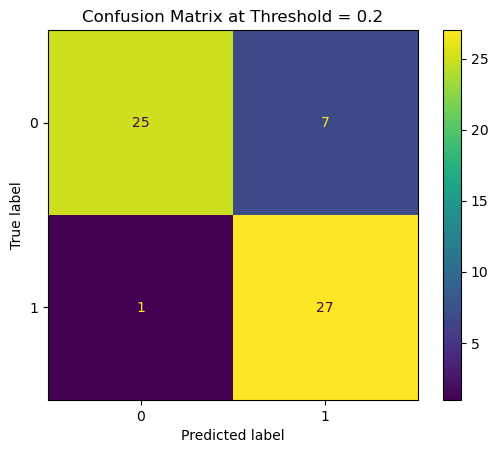

In [107]:
# Calculate the confusion matrix for the best threshold
# conf_matrix = ...
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=log_reg.classes_)
disp.plot()
plt.title('Confusion Matrix at Threshold = 0.2')
plt.show()

Evaluate the model coefficients and the odds ratio

In [36]:
# Extract coefficients and feature names
#coefficients = ...
#feature_names = ...

In [39]:
# The coefficients are the log-odds of the model
coefficients

array([-0.02928832,  0.92727832,  0.71666731,  0.52111556,  0.23717799,
       -0.49087252,  0.19925276, -0.58116973,  0.87713974,  0.25511803,
        0.36525529,  0.91499071,  0.37456882])

In [38]:
feature_names

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [40]:
# From the log-odds compute the odds ratio --> hint: use the exponential function np.exp()
# odds_ratio = ...

In [ ]:
# Sort coefficients and feature names by absolute odds_ration
sorted_indices = np.argsort(np.abs(odds_ratio))[::-1]
sorted_feature_names = feature_names[sorted_indices]
sorted_odds = odds_ratio[sorted_indices]

plt.figure(figsize=(10, 8))
plt.barh(sorted_feature_names, sorted_odds, color=['skyblue' if coef > 1 else 'salmon' for coef in sorted_odds])
plt.xlabel('Logistic Regression Coefficients')
plt.title('Impact of Features on Diabetes Outcome (Log Odds)')
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.show()

KNN

In [17]:
X = data_scaled.drop('Diagnosed', axis=1)  # Independent variables
y = data_scaled['Diagnosed']  # Dependent variable (target)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [27]:
# Train the k-NN model
#k = ...
#knn = ...
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [28]:
# Predict on the test set
#y_pred = knn...

In [29]:
# accuracy = ...
print(f"Logistic Regression Accuracy: {accuracy:.2f}")

Logistic Regression Accuracy: 0.83


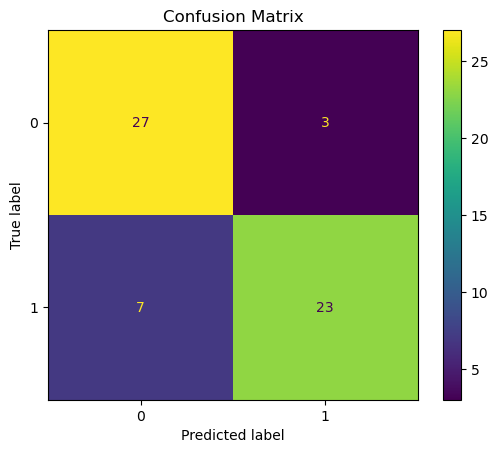

In [30]:
#conf_matrix = ...
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=knn.classes_)
disp.plot()
plt.title('Confusion Matrix')
plt.show()